In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

In [45]:
%matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')
font = {'weight': 'bold',
        'size':   16}
plt.rc('font', **font)

In [112]:
df_national_official = pd.read_csv('data/national_cdc_pandas_df.csv', index_col=0)

In [47]:
df_states_official = pd.read_csv('data/states_cdc_pandas_df.csv', index_col=0)

### Total Deaths by Year - Bar

In [48]:
df_national_official.head()

,Area,Season,Week,Threshold,Baseline,Percent_p_i,Num_influenza_deaths,Num_pneumonia_deaths,Total_deaths,Percent_complete,Calendar_year,Population,Deaths_per_hund_thou,Percent_p
0,National,2013-14,40,0.068,0.064,0.066,3,3140,47492,0.998,2013,315993715,15.029413,0.066116
1,National,2013-14,41,0.069,0.065,0.067,12,3135,47304,0.994,2013,315993715,14.969918,0.066273
2,National,2013-14,42,0.070,0.066,0.068,11,3216,47602,1.000,2013,315993715,15.064224,0.067560
3,National,2013-14,43,0.071,0.067,0.066,11,3151,47746,1.000,2013,315993715,15.109794,0.065995
4,National,2013-14,44,0.072,0.068,0.067,12,3271,48777,1.000,2013,315993715,15.436067,0.067060


In [49]:
annual_deaths = df_national_official.groupby('Calendar_year').sum()[['Total_deaths']]

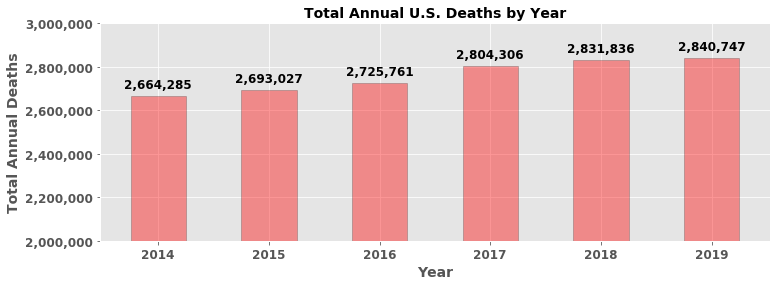

In [50]:
fig, ax = plt.subplots(figsize =(12,4))

x = annual_deaths.index[1:7]
y = annual_deaths.Total_deaths[1:7]

ax.bar(x, y, width = 0.5, align = 'center', color='red', edgecolor='black', alpha = 0.4)


ax.set_title("Total Annual U.S. Deaths by Year", fontsize = 14, fontweight="bold")
ax.set_xlabel("Year", fontsize = 14, fontweight="bold")
ax.set_ylabel("Total Annual Deaths", fontsize = 14, fontweight="bold")
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))



def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = format(int(y_value),',')

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va, size = 12)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.set_ylim([2000000,3000000])
plt.show()

In [51]:
weekly_deaths = df_national_official.groupby('Calendar_year').mean()[['Total_deaths','Percent_p_i']]

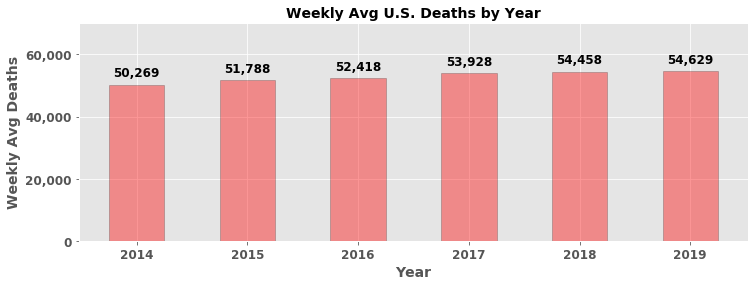

In [52]:
fig, ax = plt.subplots(figsize =(12,4))

x = weekly_deaths.index[1:7]
y = weekly_deaths.Total_deaths[1:7]

ax.bar(x, y, width = 0.5, align = 'center', color='red', edgecolor='black', alpha = 0.4)


ax.set_title("Weekly Avg U.S. Deaths by Year", fontsize = 14, fontweight="bold")
ax.set_xlabel("Year", fontsize = 14, fontweight="bold")
ax.set_ylabel("Weekly Avg Deaths", fontsize = 14, fontweight="bold")
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))



def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = format(int(y_value),',')

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va, size = 12)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.set_ylim([0,70000])
plt.show()

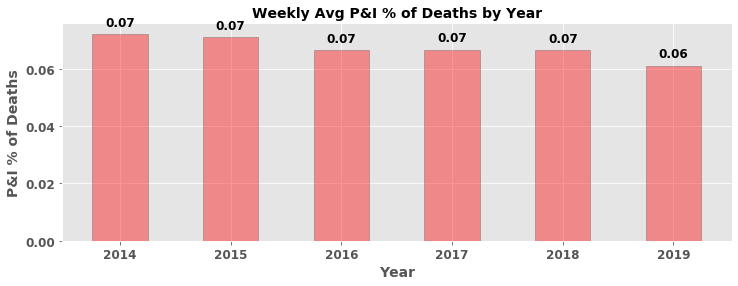

In [53]:
fig, ax = plt.subplots(figsize =(12,4))

x = weekly_deaths.index[1:7]
y = weekly_deaths.Percent_p_i[1:7]

ax.bar(x, y, width = 0.5, align = 'center', color='red', edgecolor='black', alpha = 0.4)


ax.set_title("Weekly Avg P&I % of Deaths by Year", fontsize = 14, fontweight="bold")
ax.set_xlabel("Year", fontsize = 14, fontweight="bold")
ax.set_ylabel("P&I % of Deaths", fontsize = 14, fontweight="bold")

vals = ax.get_xticks()

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)
        

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va, size = 12)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# ax.set_ylim([0,70000])
plt.show()

### Pct of Deaths by States - Vertical Bar

In [54]:
df_states_official.head()

,Season,Week,Percent_p_i,Num_influenza_deaths,Num_pneumonia_deaths,Total_deaths,Percent_complete,Calendar_year,State,Population,Deaths_per_hund_thou,Percent_p
0,2012-13,1,0.088,4,73,874,0.9,2013,Alabama,4830081,18.094935,0.083524
1,2012-13,2,0.093,12,100,1200,1.0,2013,Alabama,4830081,24.844304,0.083333
2,2012-13,3,0.100,8,102,1105,1.0,2013,Alabama,4830081,22.877463,0.092308
3,2012-13,4,0.098,4,100,1060,1.0,2013,Alabama,4830081,21.945802,0.094340
4,2012-13,5,0.083,2,83,1026,1.0,2013,Alabama,4830081,21.241880,0.080897


In [55]:
mask = df_states_official['Calendar_year'] == 2019

In [56]:
total_deaths_2019 = df_states_official[mask].sum()['Total_deaths']

In [57]:
states_2019 = df_states_official[mask].groupby('State').sum()['Total_deaths'].sort_values(ascending = False)

In [58]:
states_2019_df = pd.DataFrame(states_2019)

In [59]:
states_2019_df['%_Total_deaths'] = states_2019_df['Total_deaths']/total_deaths_2019

In [60]:
states_2019_df.head()

,Total_deaths,%_Total_deaths
State,,
California,268752,0.094606
Florida,206410,0.072660
Texas,202631,0.071330
New York,155704,0.054811
Pennsylvania,132179,0.046530


In [61]:
labels = states_2019_df.index[0:12]
state_deaths = states_2019_df['Total_deaths'][0:12]
state_death_pct = states_2019_df['%_Total_deaths'][0:12]

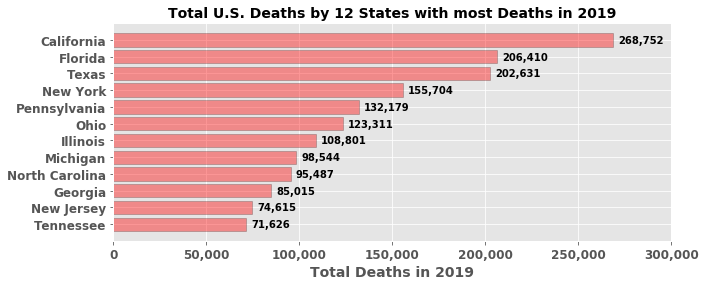

In [62]:
fig, ax = plt.subplots(figsize =(10,4))


y = np.arange(len(labels))


ax.barh(y, state_deaths, align = 'center', color='red', edgecolor='black', alpha = 0.4)
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.invert_yaxis()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.set_title("Total U.S. Deaths by 12 States with most Deaths in 2019", fontsize = 14, fontweight="bold")
ax.set_xlabel("Total Deaths in 2019", fontsize = 14, fontweight="bold")
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = format(int(x_value),',')

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha, size =10)                      # Horizontally align label differently for
                                    # positive and negative values.



ax.set_xlim([0,300000])

plt.show()

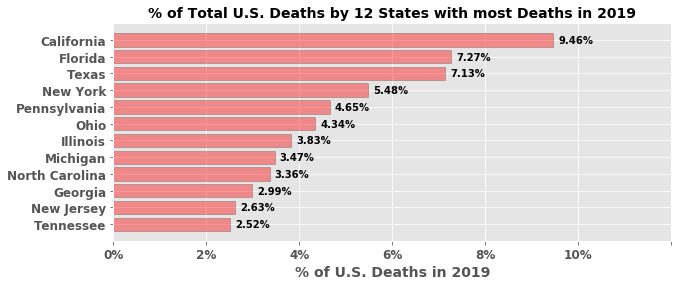

<Figure size 432x288 with 0 Axes>

In [63]:
fig, ax = plt.subplots(figsize =(10,4))


y = np.arange(len(labels))


ax.barh(y, state_death_pct, align = 'center', color='red', edgecolor='black', alpha = 0.4)
ax.set_yticks(y)
ax.set_yticklabels(labels)
vals = ax.get_xticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])

ax.invert_yaxis()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.set_title("% of Total U.S. Deaths by 12 States with most Deaths in 2019", fontsize = 14, fontweight="bold")
ax.set_xlabel("% of U.S. Deaths in 2019", fontsize = 14, fontweight="bold")
# ax.get_xaxis().set_major_formatter(
#     matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:,.2%}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha, size =10)                      # Horizontally align label differently for
                                    # positive and negative values.



ax.set_xlim([0,.12])

plt.show()
plt.tight_layout()

In [64]:
df_states_official.head()

,Season,Week,Percent_p_i,Num_influenza_deaths,Num_pneumonia_deaths,Total_deaths,Percent_complete,Calendar_year,State,Population,Deaths_per_hund_thou,Percent_p
0,2012-13,1,0.088,4,73,874,0.9,2013,Alabama,4830081,18.094935,0.083524
1,2012-13,2,0.093,12,100,1200,1.0,2013,Alabama,4830081,24.844304,0.083333
2,2012-13,3,0.100,8,102,1105,1.0,2013,Alabama,4830081,22.877463,0.092308
3,2012-13,4,0.098,4,100,1060,1.0,2013,Alabama,4830081,21.945802,0.094340
4,2012-13,5,0.083,2,83,1026,1.0,2013,Alabama,4830081,21.241880,0.080897


In [65]:
mask = (df_states_official['Percent_complete'] == 1.0) & (df_states_official['Calendar_year'] == 2019) 

In [66]:
states_2019_wk_avg = df_states_official[mask].groupby('State').mean()['Total_deaths'].sort_values(ascending = False)

In [67]:
labels = states_2019_wk_avg.index[0:12]
state_death_avgs = states_2019_wk_avg.iloc[0:12]


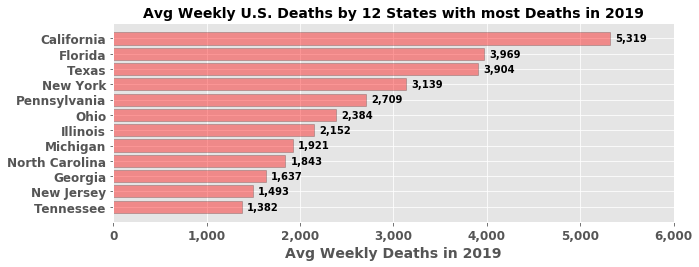

In [68]:
fig, ax = plt.subplots(figsize =(10,4))


y = np.arange(len(labels))


ax.barh(y, state_death_avgs, align = 'center', color='red', edgecolor='black', alpha = 0.4)
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.invert_yaxis()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax.set_title("Avg Weekly U.S. Deaths by 12 States with most Deaths in 2019", fontsize = 14, fontweight="bold")
ax.set_xlabel("Avg Weekly Deaths in 2019", fontsize = 14, fontweight="bold")
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = format(int(x_value),',')

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha, size =10)                      # Horizontally align label differently for
                                    # positive and negative values.



ax.set_xlim([0,6000])
plt.tight_layout()
plt.show()


### Avg Deaths per Week by year - Line Graph

In [69]:
df_national_official.head()

,Area,Season,Week,Threshold,Baseline,Percent_p_i,Num_influenza_deaths,Num_pneumonia_deaths,Total_deaths,Percent_complete,Calendar_year,Population,Deaths_per_hund_thou,Percent_p
0,National,2013-14,40,0.068,0.064,0.066,3,3140,47492,0.998,2013,315993715,15.029413,0.066116
1,National,2013-14,41,0.069,0.065,0.067,12,3135,47304,0.994,2013,315993715,14.969918,0.066273
2,National,2013-14,42,0.070,0.066,0.068,11,3216,47602,1.000,2013,315993715,15.064224,0.067560
3,National,2013-14,43,0.071,0.067,0.066,11,3151,47746,1.000,2013,315993715,15.109794,0.065995
4,National,2013-14,44,0.072,0.068,0.067,12,3271,48777,1.000,2013,315993715,15.436067,0.067060


In [70]:
years = list(df_national_official['Calendar_year'].unique())
years.sort()


In [71]:
colors = ['lightgrey','lightblue','yellowgreen','tan','gold','darkorange','red']

(40000, 70000)

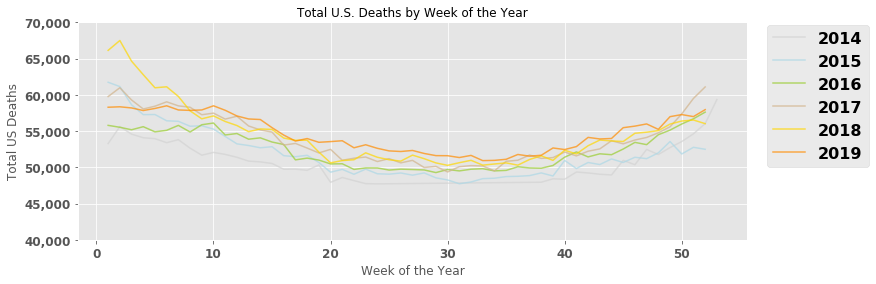

In [72]:
fig, ax = plt.subplots(figsize=(12, 4))


for year,color in zip(years[1:7],colors[0:6]):
    mask = (df_national_official['Calendar_year'] == year) & (df_national_official['Percent_complete'] == 1)
    df = df_national_official[mask].sort_values('Week')
    x = df['Week']
    y = df['Total_deaths']
    
    if year == 2020:
        ax.plot(x,y, label = year, color = color,alpha =0.8, linewidth=3, zorder =2)
        ax.scatter(x, y, s=30, color=color, zorder=1)
    else:
        ax.plot(x,y, label = year, color = color, alpha =0.7, zorder =1)

    
plt.legend(bbox_to_anchor=(1.05, 0.9),
           bbox_transform=plt.gcf().transFigure)
# ax.axhline(y=50000, color='grey', linestyle='--')

ax.set_title("Total U.S. Deaths by Week of the Year", fontsize = 12)
ax.set_xlabel("Week of the Year", fontsize = 12)
ax.set_ylabel("Total US Deaths", fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_ylim([40000,70000])

In [73]:
mask = (df_national_official['Percent_complete'] == 1) & (df_national_official['Calendar_year'] == 2019)
median_wkly_deaths_2019 = int(df_national_official[mask].median()['Total_deaths'])

(40000, 70000)

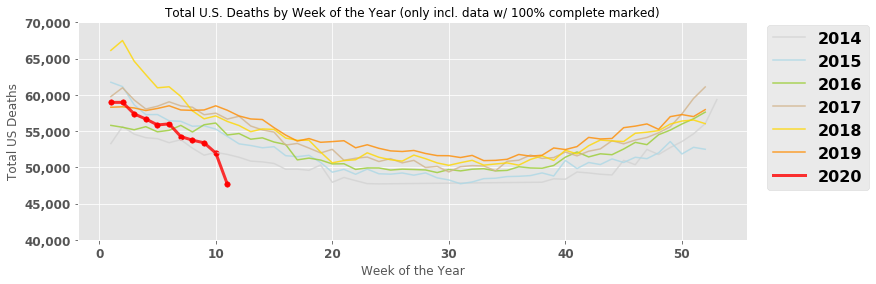

In [74]:
fig, ax = plt.subplots(figsize=(12, 4))


for year,color in zip(years[1:],colors):
    mask = (df_national_official['Calendar_year'] == year) & (df_national_official['Percent_complete'] == 1)
    df = df_national_official[mask].sort_values('Week')
    x = df['Week']
    y = df['Total_deaths']
    
    if year == 2020:
        ax.plot(x,y, label = year, color = color,alpha =0.8, linewidth=3, zorder =2)
        ax.scatter(x, y, s=30, color=color, zorder=1)
    else:
        ax.plot(x,y, label = year, color = color, alpha =0.8, zorder =1)

    
plt.legend(bbox_to_anchor=(1.05, 0.9),
           bbox_transform=plt.gcf().transFigure)
# ax.axhline(median_wkly_deaths, color='grey', linestyle='--')

ax.set_title("Total U.S. Deaths by Week of the Year (only incl. data w/ 100% complete marked)", fontsize = 12)
ax.set_xlabel("Week of the Year", fontsize = 12)
ax.set_ylabel("Total US Deaths", fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_ylim([40000,70000])



### Bar Charts for 2020 vs. prior years by Week --> Hypothesis Tests

In [75]:
df_national_official.head()

,Area,Season,Week,Threshold,Baseline,Percent_p_i,Num_influenza_deaths,Num_pneumonia_deaths,Total_deaths,Percent_complete,Calendar_year,Population,Deaths_per_hund_thou,Percent_p
0,National,2013-14,40,0.068,0.064,0.066,3,3140,47492,0.998,2013,315993715,15.029413,0.066116
1,National,2013-14,41,0.069,0.065,0.067,12,3135,47304,0.994,2013,315993715,14.969918,0.066273
2,National,2013-14,42,0.070,0.066,0.068,11,3216,47602,1.000,2013,315993715,15.064224,0.067560
3,National,2013-14,43,0.071,0.067,0.066,11,3151,47746,1.000,2013,315993715,15.109794,0.065995
4,National,2013-14,44,0.072,0.068,0.067,12,3271,48777,1.000,2013,315993715,15.436067,0.067060


In [104]:
week_labels = list(df_national_official['Week'].unique())

In [105]:
week_labels.sort()
weeks_to_11 = week_labels[:11]

In [99]:
death_lst = []
year_lst = []
week_lst = []
death_rate_lst = []
p_i_lst = []
p_lst = []

for i in range(1,len(weeks_to_11[0:11])+1):
    for year in years[1:]:
        mask = (df_national_official['Week'] == i) & (df_national_official['Calendar_year'] == year)
        df = df_national_official[mask]
        death_lst.append(df['Total_deaths'].iloc[0])
        death_rate_lst.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
        p_i_lst.append(round(df['Percent_p_i'].iloc[0],4))
        p_lst.append(round(df['Percent_p'].iloc[0],4) )

        year_lst.append(year)
        week_lst.append(i)

In [109]:
week_labels

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53]

In [114]:

death_rate_lst = []


for i in week_labels:

    mask = (df_national_official['Week'] == i) & (df_national_official['Calendar_year'] == 2018)
    df = df_national_official[mask]

    death_rate_lst.append(round(df['Deaths_per_hund_thou'].iloc[0],2))


IndexError: single positional indexer is out-of-bounds

In [101]:
death_rate_lst

[]

In [115]:
mask =  (df_national_official['Calendar_year'] == 2018) & (df_national_official['Week'] > 12)
np.mean(df_national_official[mask]['Deaths_per_hund_thou'])
np.std(df_national_official[mask]['Deaths_per_hund_thou'])

0.6067336045632687

In [36]:
y_w_d_dr_pi_p = []
for y, w, d, dr, pi, p in zip(year_lst,week_lst,death_lst, death_rate_lst, p_i_lst, p_lst):
    y_w_d_dr_pi_p.append((y,w,d,dr,pi,p))

In [37]:
deaths_2014 = []
deaths_2015 = []
deaths_2016 = []
deaths_2017 = []
deaths_2018 = []
deaths_2019 = []
deaths_2020 = [] 

dr_2014 = []
dr_2015 = []
dr_2016 = []
dr_2017 = []
dr_2018 = []
dr_2019 = []
dr_2020 = [] 

pi_2014 = []
pi_2015 = []
pi_2016 = []
pi_2017 = []
pi_2018 = []
pi_2019 = []
pi_2020 = []

p_2014 = []
p_2015 = []
p_2016 = []
p_2017 = []
p_2018 = []
p_2019 = []
p_2020 = [] 

for y,w,d,dr,pi,p in y_w_d_dr_pi_p:
    if y == 2014:
        deaths_2014.append(d)
        dr_2014.append(dr)
        pi_2014.append(pi)
        p_2014.append(p)
    elif y == 2015:
        deaths_2015.append(d)
        dr_2015.append(dr)
        pi_2015.append(pi)
        p_2015.append(p)
    elif y == 2016:
        deaths_2016.append(d)
        dr_2016.append(dr)
        pi_2016.append(pi)
        p_2016.append(p)
    elif y == 2017:
        deaths_2017.append(d)
        dr_2017.append(dr)
        pi_2017.append(pi)
        p_2017.append(p)
    elif y == 2018:
        deaths_2018.append(d)
        dr_2018.append(dr)
        pi_2018.append(pi)
        p_2018.append(p)
    elif y == 2019:
        deaths_2019.append(d)
        dr_2019.append(dr)
        pi_2019.append(pi)
        p_2019.append(p)
    elif y == 2020:
        deaths_2020.append(d)
        dr_2020.append(dr)
        pi_2020.append(pi)
        p_2020.append(p)

In [97]:
np.std(dr_2018)

1.1395460891320708

In [98]:
np.std(dr_2019)

0.07544906880453275

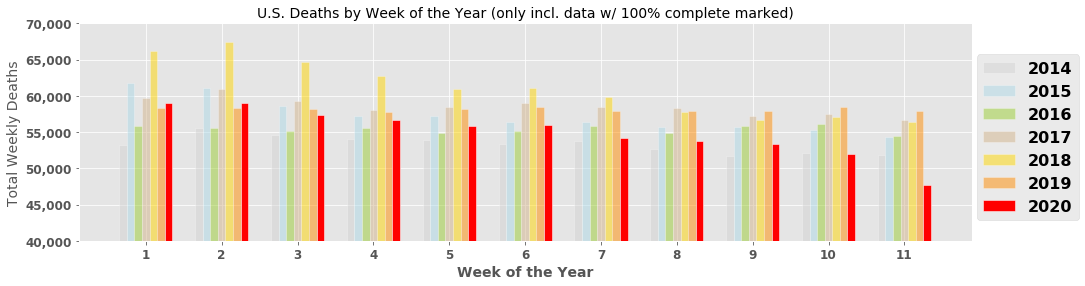

In [39]:
fig, ax = plt.subplots(figsize = (16,4))

# set width of bar
barWidth = 0.10
 
# set height of bar
bars1 = deaths_2014
bars2 = deaths_2015
bars3 = deaths_2016
bars4 = deaths_2017
bars5 = deaths_2018
bars6 = deaths_2019
bars7 = deaths_2020


weeks = weeks_to_11

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
 

colors = ['lightgrey','lightblue','yellowgreen','tan','gold','darkorange','red']

# Make the plot
ax.bar(r1, bars1,  width=barWidth, edgecolor='white', label='2014', color = colors[0], alpha = 0.5)
ax.bar(r2, bars2,  width=barWidth, edgecolor='white', label='2015', color = colors[1], alpha = 0.5)
ax.bar(r3, bars3,  width=barWidth, edgecolor='white', label='2016', color = colors[2], alpha = 0.5)
ax.bar(r4, bars4,  width=barWidth, edgecolor='white', label='2017', color = colors[3], alpha = 0.5)
ax.bar(r5, bars5,  width=barWidth, edgecolor='white', label='2018', color = colors[4], alpha = 0.5)
ax.bar(r6, bars6,  width=barWidth, edgecolor='white', label='2019', color = colors[5], alpha = 0.5)
ax.bar(r7, bars7,  width=barWidth, edgecolor='white', label='2020', color = colors[6] ,alpha = 1.0)


 
# Add xticks on the middle of the group bars
plt.xlabel('Week of Year', fontweight='bold')
plt.xticks([r + barWidth+0.2 for r in range(len(bars1))], weeks)
 
# Create legend & Show graphic
plt.legend(bbox_to_anchor=(1, 0.8),
           bbox_transform=plt.gcf().transFigure)




ax.set_title("U.S. Deaths by Week of the Year (only incl. data w/ 100% complete marked)", fontsize = 14)
ax.set_xlabel("Week of the Year", fontsize = 14)
ax.set_ylabel("Total Weekly Deaths", fontsize = 14)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_ylim([40000,70000])
plt.show()

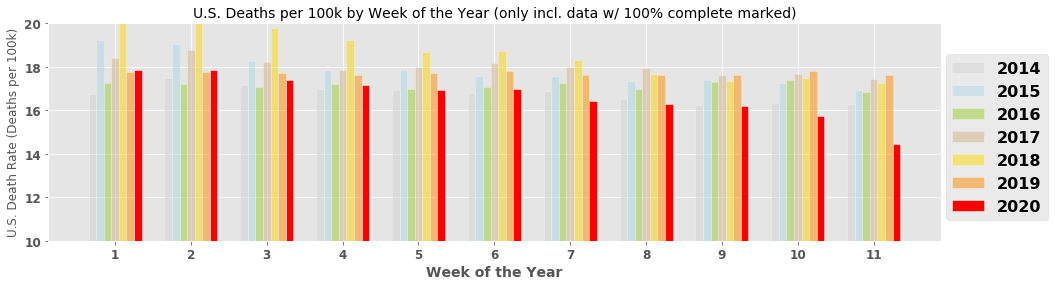

In [40]:
fig, ax = plt.subplots(figsize = (16,4))

# set width of bar
barWidth = 0.10
 
# set height of bar
bars1 = dr_2014
bars2 = dr_2015
bars3 = dr_2016
bars4 = dr_2017
bars5 = dr_2018
bars6 = dr_2019
bars7 = dr_2020


weeks = weeks_to_11

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
 

colors = ['lightgrey','lightblue','yellowgreen','tan','gold','darkorange','red']

# Make the plot
ax.bar(r1, bars1,  width=barWidth, edgecolor='white', label='2014', color = colors[0], alpha = 0.5)
ax.bar(r2, bars2,  width=barWidth, edgecolor='white', label='2015', color = colors[1], alpha = 0.5)
ax.bar(r3, bars3,  width=barWidth, edgecolor='white', label='2016', color = colors[2], alpha = 0.5)
ax.bar(r4, bars4,  width=barWidth, edgecolor='white', label='2017', color = colors[3], alpha = 0.5)
ax.bar(r5, bars5,  width=barWidth, edgecolor='white', label='2018', color = colors[4], alpha = 0.5)
ax.bar(r6, bars6,  width=barWidth, edgecolor='white', label='2019', color = colors[5], alpha = 0.5)
ax.bar(r7, bars7,  width=barWidth, edgecolor='white', label='2020', color = colors[6] ,alpha = 1.0)


 
# Add xticks on the middle of the group bars
plt.xlabel('Week of Year', fontweight='bold')
plt.xticks([r + barWidth+0.2 for r in range(len(bars1))], weeks)
 
# Create legend & Show graphic
plt.legend(bbox_to_anchor=(1, 0.8),
           bbox_transform=plt.gcf().transFigure)




ax.set_title("U.S. Deaths per 100k by Week of the Year (only incl. data w/ 100% complete marked)", fontsize = 14)
ax.set_xlabel("Week of the Year", fontsize = 14)
ax.set_ylabel("U.S. Death Rate (Deaths per 100k)", fontsize = 12)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_ylim([10,20])
plt.show()

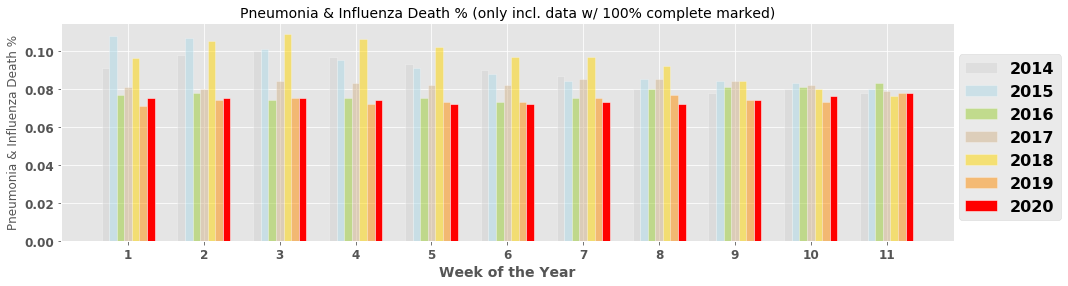

In [41]:
fig, ax = plt.subplots(figsize = (16,4))

# set width of bar
barWidth = 0.10
 
# set height of bar
bars1 = pi_2014
bars2 = pi_2015
bars3 = pi_2016
bars4 = pi_2017
bars5 = pi_2018
bars6 = pi_2019
bars7 = pi_2020


weeks = weeks_to_11

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
 

colors = ['lightgrey','lightblue','yellowgreen','tan','gold','darkorange','red']

# Make the plot
ax.bar(r1, bars1,  width=barWidth, edgecolor='white', label='2014', color = colors[0], alpha = 0.5)
ax.bar(r2, bars2,  width=barWidth, edgecolor='white', label='2015', color = colors[1], alpha = 0.5)
ax.bar(r3, bars3,  width=barWidth, edgecolor='white', label='2016', color = colors[2], alpha = 0.5)
ax.bar(r4, bars4,  width=barWidth, edgecolor='white', label='2017', color = colors[3], alpha = 0.5)
ax.bar(r5, bars5,  width=barWidth, edgecolor='white', label='2018', color = colors[4], alpha = 0.5)
ax.bar(r6, bars6,  width=barWidth, edgecolor='white', label='2019', color = colors[5], alpha = 0.5)
ax.bar(r7, bars7,  width=barWidth, edgecolor='white', label='2020', color = colors[6] ,alpha = 1.0)


 
# Add xticks on the middle of the group bars
plt.xlabel('Week of Year', fontweight='bold')
plt.xticks([r + barWidth+0.2 for r in range(len(bars1))], weeks)
 
# Create legend & Show graphic
plt.legend(bbox_to_anchor=(1, 0.8),
           bbox_transform=plt.gcf().transFigure)




ax.set_title("Pneumonia & Influenza Death % (only incl. data w/ 100% complete marked)", fontsize = 14)
ax.set_xlabel("Week of the Year", fontsize = 14)
ax.set_ylabel("Pneumonia & Influenza Death %", fontsize = 12)

# ax.get_yaxis().set_major_formatter(
#     matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# ax.set_ylim([10,20])
plt.show()

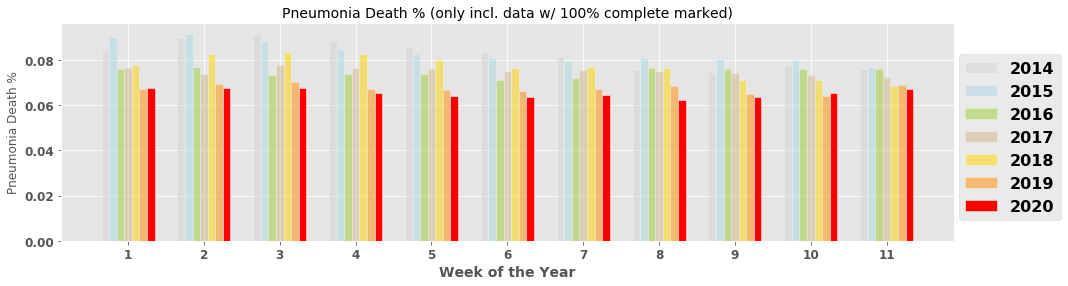

In [42]:
fig, ax = plt.subplots(figsize = (16,4))

# set width of bar
barWidth = 0.10
 
# set height of bar
bars1 = p_2014
bars2 = p_2015
bars3 = p_2016
bars4 = p_2017
bars5 = p_2018
bars6 = p_2019
bars7 = p_2020


weeks = weeks_to_11

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
 

colors = ['lightgrey','lightblue','yellowgreen','tan','gold','darkorange','red']

# Make the plot
ax.bar(r1, bars1,  width=barWidth, edgecolor='white', label='2014', color = colors[0], alpha = 0.5)
ax.bar(r2, bars2,  width=barWidth, edgecolor='white', label='2015', color = colors[1], alpha = 0.5)
ax.bar(r3, bars3,  width=barWidth, edgecolor='white', label='2016', color = colors[2], alpha = 0.5)
ax.bar(r4, bars4,  width=barWidth, edgecolor='white', label='2017', color = colors[3], alpha = 0.5)
ax.bar(r5, bars5,  width=barWidth, edgecolor='white', label='2018', color = colors[4], alpha = 0.5)
ax.bar(r6, bars6,  width=barWidth, edgecolor='white', label='2019', color = colors[5], alpha = 0.5)
ax.bar(r7, bars7,  width=barWidth, edgecolor='white', label='2020', color = colors[6] ,alpha = 1.0)


 
# Add xticks on the middle of the group bars
plt.xlabel('Week of Year', fontweight='bold')
plt.xticks([r + barWidth+0.2 for r in range(len(bars1))], weeks)
 
# Create legend & Show graphic
plt.legend(bbox_to_anchor=(1, 0.8),
           bbox_transform=plt.gcf().transFigure)




ax.set_title("Pneumonia Death % (only incl. data w/ 100% complete marked)", fontsize = 14)
ax.set_xlabel("Week of the Year", fontsize = 14)
ax.set_ylabel("Pneumonia Death %", fontsize = 12)

# ax.get_yaxis().set_major_formatter(
#     matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# ax.set_ylim([10,20])
plt.show()

### Distribution of Deaths by Week

In [43]:
deaths_2020

[58961, 58962, 57371, 56666, 55849, 55992, 54246, 53745, 53382, 51978, 47655]

In [44]:
deaths_2019

[58289, 58351, 58193, 57834, 58122, 58489, 57915, 57856, 57915, 58488, 57869]

In [45]:
for nd, d in zip(deaths_2020,deaths_2019):
    print(nd-d)

672
611
-822
-1168
-2273
-2497
-3669
-4111
-4533
-6510
-10214


In [46]:
for nd, d in zip(dr_2020,dr_2019):
    print(nd-d)

0.10999999999999943
0.08999999999999986
-0.33999999999999986
-0.4400000000000013
-0.7800000000000011
-0.8500000000000014
-1.1999999999999993
-1.3399999999999999
-1.4600000000000009
-2.0600000000000005
-3.1799999999999997


In [47]:
for nd, d in zip(pi_2020,pi_2019):
    print(nd-d)

0.0040000000000000036
0.0010000000000000009
0.0
0.0020000000000000018
-0.0010000000000000009
-0.0010000000000000009
-0.0020000000000000018
-0.0050000000000000044
0.0
0.0030000000000000027
0.0


In [48]:
for nd, d in zip(p_2020,p_2019):
    print(nd-d)

0.0005000000000000004
-0.0019000000000000128
-0.002600000000000005
-0.0016999999999999932
-0.0029
-0.0029
-0.002699999999999994
-0.006199999999999997
-0.0012999999999999956
0.0015000000000000013
-0.0016000000000000042


In [49]:
# Death Rates incl Year are here
y_w_d_dr_pi_p

[(2014, 1, 53277, 16.74, 0.091, 0.0843),
 (2015, 1, 61737, 19.25, 0.108, 0.0903),
 (2016, 1, 55788, 17.27, 0.077, 0.076),
 (2017, 1, 59763, 18.39, 0.081, 0.0763),
 (2018, 1, 66134, 20.24, 0.096, 0.078),
 (2019, 1, 58289, 17.76, 0.071, 0.0672),
 (2020, 1, 58961, 17.87, 0.075, 0.0677),
 (2014, 2, 55620, 17.47, 0.098, 0.0897),
 (2015, 2, 61141, 19.07, 0.107, 0.0914),
 (2016, 2, 55525, 17.19, 0.078, 0.077),
 (2017, 2, 60980, 18.76, 0.08, 0.0739),
 (2018, 2, 67495, 20.66, 0.105, 0.0827),
 (2019, 2, 58351, 17.78, 0.074, 0.0695),
 (2020, 2, 58962, 17.87, 0.075, 0.0676),
 (2014, 3, 54580, 17.15, 0.1, 0.0917),
 (2015, 3, 58628, 18.28, 0.101, 0.0884),
 (2016, 3, 55182, 17.09, 0.074, 0.0733),
 (2017, 3, 59293, 18.24, 0.084, 0.0779),
 (2018, 3, 64647, 19.79, 0.109, 0.0837),
 (2019, 3, 58193, 17.73, 0.075, 0.0704),
 (2020, 3, 57371, 17.39, 0.075, 0.0678),
 (2014, 4, 54085, 16.99, 0.097, 0.0884),
 (2015, 4, 57269, 17.86, 0.095, 0.0848),
 (2016, 4, 55606, 17.22, 0.075, 0.0739),
 (2017, 4, 58047, 17.8

In [59]:
weekly_deaths = []

for i in y_w_d_dr_pi_p:
    weekly_deaths.append(i[2])

In [60]:
len(weekly_deaths)

77

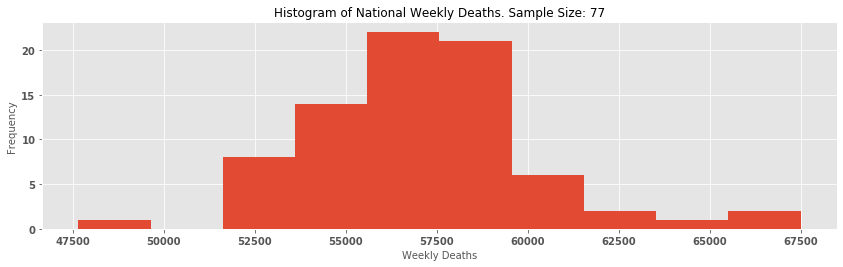

In [61]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.hist(weekly_deaths)
ax.set_title(f'Histogram of National Weekly Deaths. Sample Size: {len(weekly_deaths)}',fontsize = 12)
ax.set_xlabel("Weekly Deaths", fontsize = 10)
ax.set_ylabel("Frequency", fontsize = 10)
ax.tick_params(axis = 'x', labelsize = 10)
ax.tick_params(axis = 'y', labelsize = 10)
    
fig.tight_layout()

In [53]:
df_states_official.head()

,Season,Week,Percent_p_i,Num_influenza_deaths,Num_pneumonia_deaths,Total_deaths,Percent_complete,Calendar_year,State,Population,Deaths_per_hund_thou,Percent_p
0,2012-13,1,0.088,4,73,874,0.9,2013,Alabama,4830081,18.094935,0.083524
1,2012-13,2,0.093,12,100,1200,1.0,2013,Alabama,4830081,24.844304,0.083333
2,2012-13,3,0.100,8,102,1105,1.0,2013,Alabama,4830081,22.877463,0.092308
3,2012-13,4,0.098,4,100,1060,1.0,2013,Alabama,4830081,21.945802,0.094340
4,2012-13,5,0.083,2,83,1026,1.0,2013,Alabama,4830081,21.241880,0.080897


In [54]:
week_labels = list(df_states_official['Week'].unique())
week_labels.sort()
weeks_to_11 = week_labels[:11]

In [55]:
labels = states_2019_df.index[0:12]
top_states_list = list(labels)
len(top_states_list)

12

In [56]:
top_states_list[0:8]

['California',
 'Florida',
 'Texas',
 'New York',
 'Pennsylvania',
 'Ohio',
 'Illinois',
 'Michigan']

In [57]:
state_dict = {}
for state in top_states_list[0:8]:
    state_death_lst = []
    for year in years[1:]: 
        for week in weeks_to_11[0:11]:
            mask = (df_states_official['Week'] == week) & (df_states_official['Calendar_year'] == year)\
            & (df_states_official['State'] == state) & (df_states_official['Percent_complete'] == 1) 
            if len(df_states_official[mask]['Total_deaths']) == 0: # checks to see if criteria above is fit or not, if not, pass this week
                continue 
            else:
                weekly_deaths = df_states_official[mask]['Total_deaths'].iloc[0]
                state_death_lst.append(weekly_deaths)
    state_dict[state] = state_death_lst
    state_death_lst = []
    

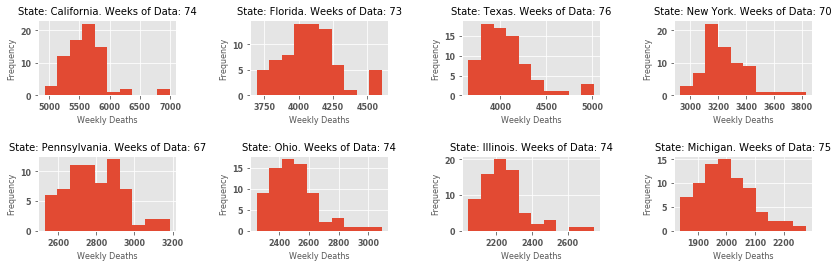

In [58]:

fig, axs = plt.subplots(2, 4, figsize=(12, 4))

for idx, (ax, state) in enumerate(zip(axs.flatten(), top_states_list[0:8])):
    ax.hist(state_dict[state])
    ax.set_title(f'State: {state}. Weeks of Data: {len(state_dict[state])}',fontsize = 10)

    ax.set_xlabel("Weekly Deaths", fontsize = 8)
    ax.set_ylabel("Frequency", fontsize = 8)
    ax.tick_params(axis = 'x', labelsize = 8)
    ax.tick_params(axis = 'y', labelsize = 8)
    

# plt.grid(true)
fig.tight_layout()

In [86]:
import scipy.stats as stats

### If I assume 2014-2019 data gives me the population avg of weekly death rates (Total Deaths/Population) from wks 1-11, I can plot the distribution of death_rates from wks 1-11 using the binomial dist.

In [62]:
weekly_dr = []
for elem in y_w_d_dr_pi_p:
    if elem[0] == 2020:
        continue
    else:
        weekly_dr.append(elem[3])
        
    

In [85]:
avg_dr = sum(weekly_dr)/len(weekly_dr)/100000
avg_dr*100

0.017690909090909097

$$\text{# of Deaths in a Week} \sim \text{Binomial} (n= U.S. Population , p=0.017)%)$$

In [92]:
pop_2020 = df_national_official[df_national_official['Calendar_year'] == 2020]['Population'].iloc[0]

Text(0.5, 1.0, '# of Weekly Deaths Under The Null Hypothesis')

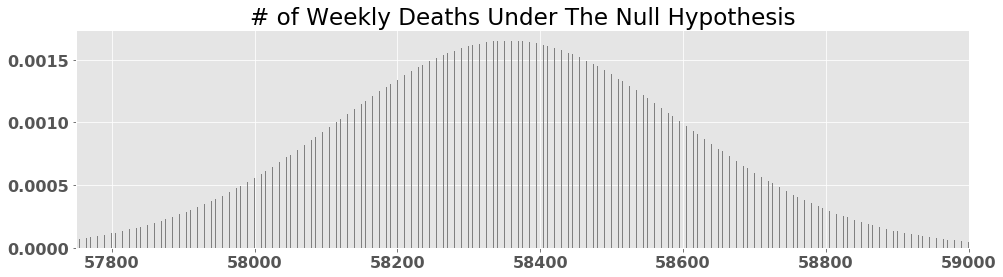

In [125]:
binomial = stats.binom(pop_2020, avg_dr)

fig, ax = plt.subplots(1, figsize=(16, 4))
bars = ax.bar(range(57350,59350,5), [binomial.pmf(i) for i in range(57350,59350,5)], align="center", color="grey")
ax.set_xlim(57750, 59000)
ax.set_title("# of Weekly Deaths Under The Null Hypothesis")

In [130]:
[binomial.ppf(0.025),binomial.ppf(.975)]

[57883.0, 58830.0]

In [138]:
weekly_d_2020 = []

weekly_dr_2020 = []
weekly_dr_2019 = []
for elem in y_w_d_dr_pi_p:
    if elem[0] == 2020:
        weekly_d_2020.append(elem[2])
        weekly_dr_2020.append(elem[3])
    elif elem[0] == 2019:
        weekly_dr_2019.append(elem[3])
    

In [128]:
weekly_avg_2020 = sum(weekly_d_2020)/len(weekly_d_2020)
binomial.cdf(weekly_avg_2020)


1.7712454891218638e-45

In [123]:
for death in weekly_d_2020:
    print(death, binomial.cdf(death))

58961 0.9938168988856547
58962 0.9938885695085969
57371 2.1734379775320467e-05
56666 1.0363238416967275e-12
55849 7.074244402629432e-26
55992 3.331294115072129e-23
54246 9.437219274125968e-67
53745 1.0578068389457022e-83
53382 3.019129528802568e-97
51978 8.955742444980018e-160
47655 0.0


### Bootstrap sample of Weekly Deaths Rate through Wks 1-11 by year and compare confidence intervals

In [139]:
weekly_dr_2020

[17.87, 17.87, 17.39, 17.18, 16.93, 16.97, 16.44, 16.29, 16.18, 15.76, 14.45]

In [140]:
np.random.seed(333)
bootstrap_sample_avg_weekly_death_rate = []
for i in range(10000):
    bootstrap = np.random.choice(weekly_dr_2020, size=len(weekly_dr_2020), replace=True)
    bootstrap_mean = np.mean(bootstrap)
    bootstrap_sample_avg_weekly_death_rate.append(bootstrap_mean)

Text(0.5, 1.0, 'boostrap sample means of weekly death rate 2020')

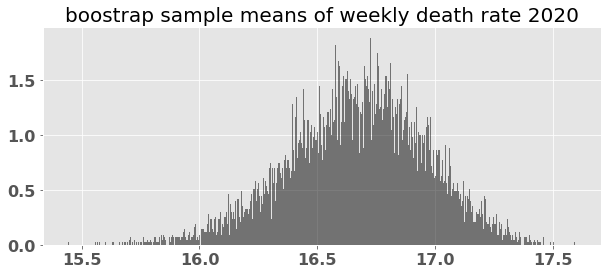

In [141]:
fig, ax = plt.subplots(1, figsize=(10, 4))
ax.hist(bootstrap_sample_avg_weekly_death_rate, bins=500, density=True, color="black", alpha=0.5)
ax.set_title("boostrap sample means of weekly death rate 2020", fontsize=20)

In [142]:
left_endpoint = np.percentile(bootstrap_sample_avg_weekly_death_rate, 2.5)
right_endpoint = np.percentile(bootstrap_sample_avg_weekly_death_rate, 97.5)
[left_endpoint, right_endpoint]

[16.059068181818176, 17.210909090909094]

In [143]:
np.random.seed(333)
bootstrap_sample_avg_weekly_death_rate = []
for i in range(10000):
    bootstrap = np.random.choice(weekly_dr_2019, size=len(weekly_dr_2019), replace=True)
    bootstrap_mean = np.mean(bootstrap)
    bootstrap_sample_avg_weekly_death_rate.append(bootstrap_mean)

Text(0.5, 1.0, 'boostrap sample means of weekly death rate 2019')

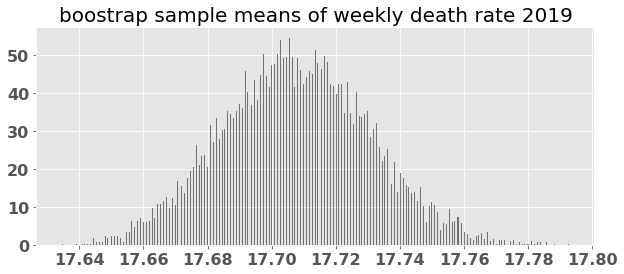

In [144]:
fig, ax = plt.subplots(1, figsize=(10, 4))
ax.hist(bootstrap_sample_avg_weekly_death_rate, bins=500, density=True, color="black", alpha=0.5)
ax.set_title("boostrap sample means of weekly death rate 2019", fontsize=20)

In [145]:
left_endpoint = np.percentile(bootstrap_sample_avg_weekly_death_rate, 2.5)
right_endpoint = np.percentile(bootstrap_sample_avg_weekly_death_rate, 97.5)
[left_endpoint, right_endpoint]

[17.66363636363636, 17.753636363636364]

### Assuming Normality in Population (i.e. probability to die in a given week is normally distributed), then I can compare 2020 avg weekly death rate vs. 2019 avg weekly death rate using Welsh T-Test.  Is this the correct assumption?

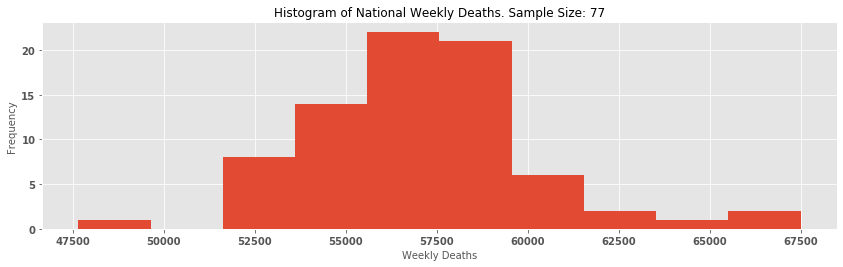

In [149]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.hist(weekly_deaths)
ax.set_title(f'Histogram of National Weekly Deaths. Sample Size: {len(weekly_deaths)}',fontsize = 12)
ax.set_xlabel("Weekly Deaths", fontsize = 10)
ax.set_ylabel("Frequency", fontsize = 10)
ax.tick_params(axis = 'x', labelsize = 10)
ax.tick_params(axis = 'y', labelsize = 10)
    
fig.tight_layout()

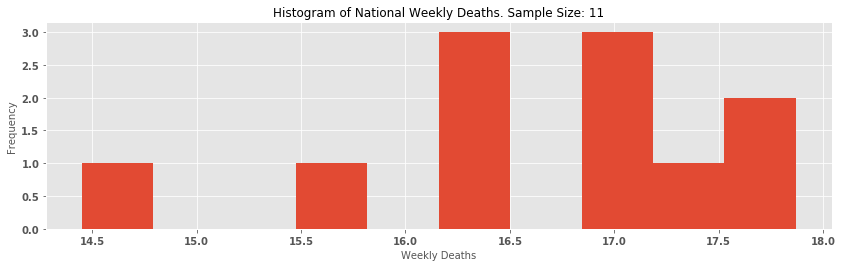

In [152]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.hist(weekly_dr_2020)
ax.set_title(f'Histogram of National Weekly Deaths. Sample Size: {len(weekly_dr_2020)}',fontsize = 12)
ax.set_xlabel("Weekly Deaths", fontsize = 10)
ax.set_ylabel("Frequency", fontsize = 10)
ax.tick_params(axis = 'x', labelsize = 10)
ax.tick_params(axis = 'y', labelsize = 10)
    
fig.tight_layout()

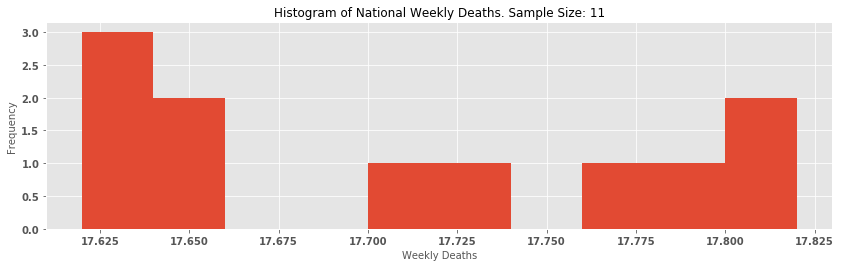

In [153]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.hist(weekly_dr_2019)
ax.set_title(f'Histogram of National Weekly Deaths. Sample Size: {len(weekly_dr_2019)}',fontsize = 12)
ax.set_xlabel("Weekly Deaths", fontsize = 10)
ax.set_ylabel("Frequency", fontsize = 10)
ax.tick_params(axis = 'x', labelsize = 10)
ax.tick_params(axis = 'y', labelsize = 10)
    
fig.tight_layout()

In [154]:
np.var(weekly_dr_2020)

0.9099867768595048

In [155]:
np.var(weekly_dr_2019)

0.005692561983471117

In [156]:
stats.ttest_ind(weekly_dr_2020,weekly_dr_2019, equal_var = False)

Ttest_indResult(statistic=-3.439862586764269, pvalue=0.006220009268575825)

In [157]:
stats.ttest_ind(weekly_dr_2020,weekly_dr_2019, equal_var = True)

Ttest_indResult(statistic=-3.439862586764269, pvalue=0.0025916111264198422)

In [159]:
stats.mannwhitneyu(weekly_dr_2020, weekly_dr_2019, alternative="two-sided")


MannwhitneyuResult(statistic=22.0, pvalue=0.012486339133591541)

In [163]:
np.mean(dr_2020)

16.666363636363634

In [164]:
np.mean(dr_2019)

17.707272727272724

[Text(0, 0, '2020'),
 Text(0, 0, '2019'),
 Text(0, 0, '2018'),
 Text(0, 0, '2017'),
 Text(0, 0, '2016'),
 Text(0, 0, '2015'),
 Text(0, 0, '2014')]

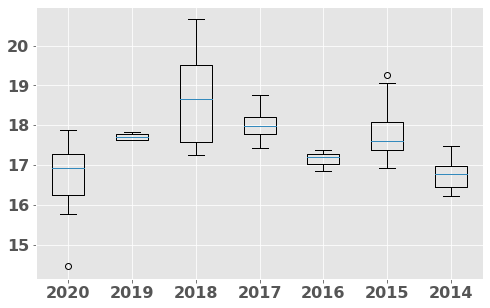

In [169]:
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.boxplot([dr_2020, dr_2019, dr_2018, dr_2017, dr_2016, dr_2015, dr_2014])
ax.set_xticks([1,2,3,4,5,6, 7])
ax.set_xticklabels(['2020', '2019', '2018', '2017', '2016', '2015', '2014'])

[Text(0, 0, '2020'),
 Text(0, 0, '2019'),
 Text(0, 0, '2018'),
 Text(0, 0, '2017'),
 Text(0, 0, '2016'),
 Text(0, 0, '2015'),
 Text(0, 0, '2014')]

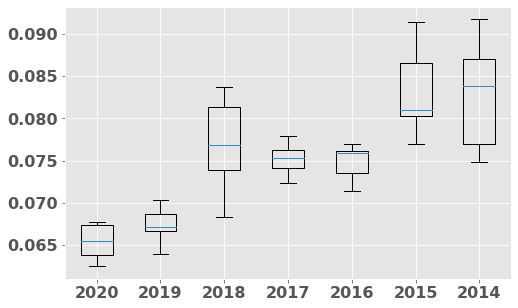

In [170]:
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.boxplot([p_2020, p_2019, p_2018, p_2017, p_2016, p_2015, p_2014])
ax.set_xticks([1,2,3,4,5,6, 7])
ax.set_xticklabels(['2020', '2019', '2018', '2017', '2016', '2015', '2014'])

[Text(0, 0, '2020'),
 Text(0, 0, '2019'),
 Text(0, 0, '2018'),
 Text(0, 0, '2017'),
 Text(0, 0, '2016'),
 Text(0, 0, '2015'),
 Text(0, 0, '2014')]

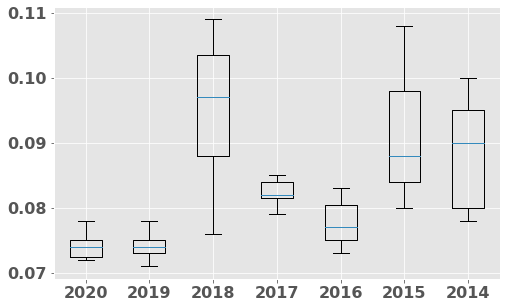

In [172]:
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.boxplot([pi_2020, pi_2019, pi_2018, pi_2017, pi_2016, pi_2015, pi_2014])
ax.set_xticks([1,2,3,4,5,6, 7])
ax.set_xticklabels(['2020', '2019', '2018', '2017', '2016', '2015', '2014'])

[Text(0, 0, '2020'),
 Text(0, 0, '2019'),
 Text(0, 0, '2018'),
 Text(0, 0, '2017'),
 Text(0, 0, '2016'),
 Text(0, 0, '2015'),
 Text(0, 0, '2014')]

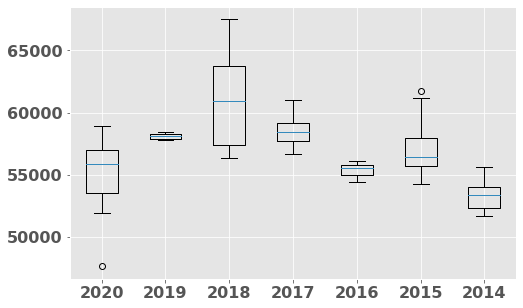

In [174]:
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.boxplot([deaths_2020, deaths_2019, deaths_2018, deaths_2017, deaths_2016, deaths_2015, deaths_2014])
ax.set_xticks([1,2,3,4,5,6, 7])
ax.set_xticklabels(['2020', '2019', '2018', '2017', '2016', '2015', '2014'])

In [ ]:

#First Sample Statistic - Death Rate (Natl, State). Compared to 2019 and compared to 2014-2019
#Second Sample Statistic - %Influenza & Pneumonia (Natl, State). Compared to 2019 and compared to 2014-2019
#Third Sample Statistic - Plot COVID Deaths vs. Deaths in some States